___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [7]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [8]:
plt.imshow(x_train[15])

NameError: name 'x_train' is not defined

In [ ]:
y_train[0]

In [ ]:
classes[y_train[0]]

In [9]:
classes[int(y_train[0])]

'Ankle boot'

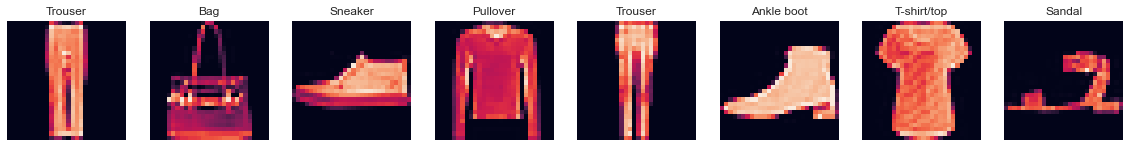

In [11]:
plt.figure(figsize=(20, 20))
for i in range(8):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(1, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [12]:
X_train[5].min()

0

In [13]:
X_train[5].max()

255

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [15]:
X_train[5].min()

0.0

In [16]:
X_train[5].max()

1.0

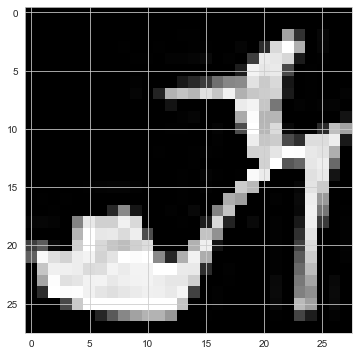

In [17]:
plt.imshow(X_train[9],cmap='gray')

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [18]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [19]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [20]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [23]:
y_train[0]

9

In [24]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [26]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))
          
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])          

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

In [30]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop]) 

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.4072 - accuracy: 0.8554 - val_loss: 0.3266 - val_accuracy: 0.8842
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2710 - accuracy: 0.9015 - val_loss: 0.2777 - val_accuracy: 0.8999
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2306 - accuracy: 0.9156 - val_loss: 0.2649 - val_accuracy: 0.9051
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2032 - accuracy: 0.9252 - val_loss: 0.2628 - val_accuracy: 0.9093
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1806 - accuracy: 0.9350 - val_loss: 0.2840 - val_accuracy: 0.8988
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1649 - accuracy: 0.9412 - val_loss: 0.2895 - val_accuracy: 0.9067


**TASK 7: Plot values of metrics you used in your model.**

In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.407,0.855,0.327,0.884
1,0.271,0.902,0.278,0.900
2,0.231,0.916,0.265,0.905
3,0.203,0.925,0.263,0.909
4,0.181,0.935,0.284,0.899


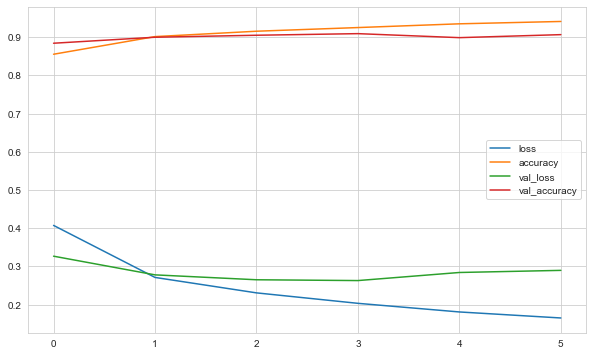

In [33]:
summary.plot();

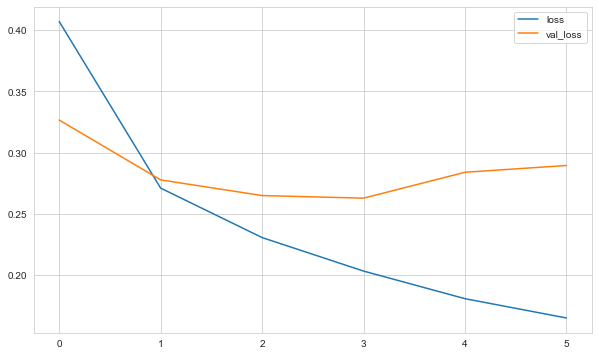

In [34]:
summary[["loss", "val_loss"]].plot();

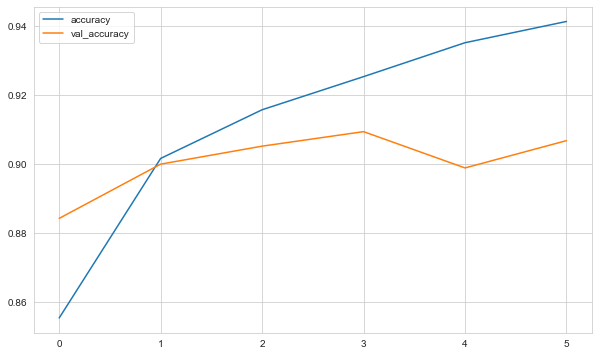

In [35]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [36]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [37]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2628 - accuracy: 0.9093


[0.26279518008232117, 0.9093000292778015]

In [38]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.26279518008232117
Test accuracy: 0.9093000292778015


In [39]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 3ms/step


array([[1.3746962e-05, 1.0914524e-09, 1.3579480e-06, ..., 3.5498864e-03,
        8.1992739e-06, 9.9578309e-01],
       [4.0103155e-06, 1.5901069e-15, 9.9999130e-01, ..., 9.6434098e-14,
        5.3232666e-12, 1.3808603e-12],
       [2.5812770e-07, 9.9999976e-01, 5.5773870e-09, ..., 1.4324456e-10,
        1.3184985e-10, 4.2917886e-10],
       ...,
       [1.0563475e-05, 2.2734443e-10, 7.7392707e-07, ..., 2.9877526e-07,
        9.9993575e-01, 7.6151219e-09],
       [1.9784140e-07, 9.9998140e-01, 7.9509853e-08, ..., 1.6928744e-09,
        9.3133457e-10, 1.2784022e-07],
       [3.3669921e-03, 2.3610592e-05, 3.2340731e-03, ..., 8.5637890e-02,
        1.3718664e-02, 3.7775254e-03]], dtype=float32)

In [40]:
pred_prob[0]

array([1.3746962e-05, 1.0914524e-09, 1.3579480e-06, 3.6366746e-08,
       3.5153815e-07, 6.2434666e-04, 1.8993942e-05, 3.5498864e-03,
       8.1992739e-06, 9.9578309e-01], dtype=float32)

In [41]:
np.argmax(pred_prob[0])

9

In [42]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [43]:
y_pred.shape

(10000,)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.89      0.85      1000
           3       0.93      0.91      0.92      1000
           4       0.88      0.84      0.86      1000
           5       0.99      0.96      0.98      1000
           6       0.79      0.70      0.74      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [45]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [46]:
print(confusion_matrix(y_test, y_pred))

[[907   0  15   6   3   0  62   0   7   0]
 [  2 975   2  13   2   0   6   0   0   0]
 [ 20   0 885   8  42   0  45   0   0   0]
 [ 22   3  13 908  18   0  31   0   5   0]
 [  2   1  97  22 839   0  39   0   0   0]
 [  0   0   0   0   0 965   0  26   0   9]
 [143   1  78  21  52   0 696   0   9   0]
 [  0   0   0   0   0   5   0 969   1  25]
 [  2   1   3   1   1   1   1   5 985   0]
 [  1   0   0   0   0   6   0  29   0 964]]


<AxesSubplot:>

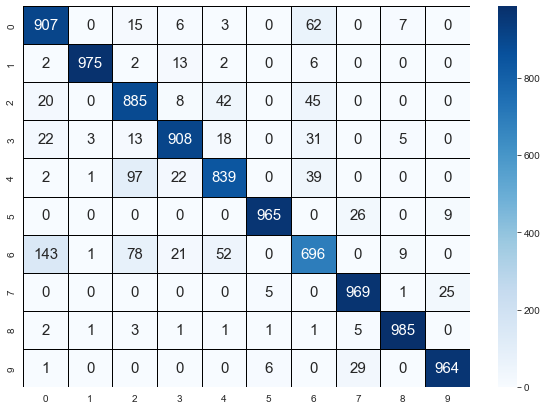

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

## Prediction

In [48]:
my_image = X_test[34]

In [49]:
my_image.shape

(28, 28, 1)

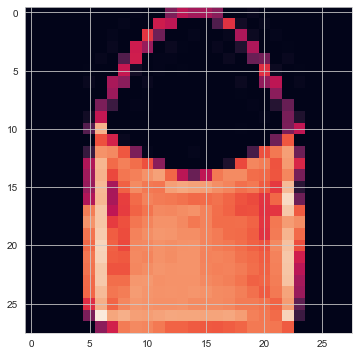

In [50]:
plt.imshow(my_image.reshape(28,28));

In [51]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

1/1 [==============================] - 0s 20ms/step


In [52]:
image_prediction

array([[2.9047435e-05, 2.9334096e-10, 2.3874986e-06, 2.6678832e-08,
        2.5591632e-06, 6.6144264e-04, 1.8401258e-06, 6.9117974e-08,
        9.9930263e-01, 9.4496889e-11]], dtype=float32)

In [53]:
result=np.argmax(image_prediction, axis=1)

In [54]:
classes[int(result)]

'Bag'

In [55]:
model.save("cnn-3.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___